In [1]:
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
import random

from gensim.models import Word2Vec

from sklearn.decomposition import IncrementalPCA   
from sklearn.manifold import TSNE   

In [33]:
# read a file you have stored locally
# I added the Hunger Games for simplicity
import requests

# Define the URL
url = "https://www.gutenberg.org/cache/epub/41/pg41.txt"

# Send an HTTP GET request to the URL
file = requests.get(url)
file_content = file.text

# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
    file_content = file_content.replace(char, " ")

# check
print(file_content[:100])

﻿The Project Gutenberg eBook of The Legend of Sleepy Hollow        This ebook is for the use of anyo


In [63]:
file_content = file_content[1185:]


In [35]:
# this is simplified for demonstration
def sample_clean_text(text: str):
    # step 1: tokenize the text into sentences
    sentences = nltk.sent_tokenize(text)

    # step 2: tokenize each sentence into words
    tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

    # step 3: convert each word to lowercase
    tokenized_text = [[word.lower() for word in sent] for sent in tokenized_sentences]
    
    # return your tokens
    return tokenized_text

# call the function
tokens = sample_clean_text(text = file_content)

# check
print(tokens[:10])

[['in', 'the', 'bosom', 'of', 'one', 'of', 'those', 'spacious', 'coves', 'which', 'indent', 'the', 'eastern', 'shore', 'of', 'the', 'hudson', ',', 'at', 'that', 'broad', 'expansion', 'of', 'the', 'river', 'denominated', 'by', 'the', 'ancient', 'dutch', 'navigators', 'the', 'tappan', 'zee', ',', 'and', 'where', 'they', 'always', 'prudently', 'shortened', 'sail', 'and', 'implored', 'the', 'protection', 'of', 'st.', 'nicholas', 'when', 'they', 'crossed', ',', 'there', 'lies', 'a', 'small', 'market', 'town', 'or', 'rural', 'port', ',', 'which', 'by', 'some', 'is', 'called', 'greensburgh', ',', 'but', 'which', 'is', 'more', 'generally', 'and', 'properly', 'known', 'by', 'the', 'name', 'of', 'tarry', 'town', '.'], ['this', 'name', 'was', 'given', ',', 'we', 'are', 'told', ',', 'in', 'former', 'days', ',', 'by', 'the', 'good', 'housewives', 'of', 'the', 'adjacent', 'country', ',', 'from', 'the', 'inveterate', 'propensity', 'of', 'their', 'husbands', 'to', 'linger', 'about', 'the', 'village', 

In [36]:
model = Word2Vec(tokens,vector_size=100)

In [37]:
model.wv.key_to_index

{',': 0,
 'the': 1,
 'of': 2,
 'and': 3,
 '.': 4,
 'a': 5,
 'to': 6,
 'in': 7,
 'his': 8,
 'was': 9,
 'he': 10,
 'with': 11,
 ';': 12,
 'that': 13,
 'or': 14,
 'it': 15,
 'by': 16,
 'on': 17,
 'for': 18,
 'as': 19,
 'at': 20,
 'this': 21,
 'project': 22,
 'had': 23,
 'from': 24,
 'which': 25,
 'you': 26,
 'but': 27,
 'all': 28,
 'not': 29,
 'is': 30,
 'gutenberg™': 31,
 'be': 32,
 'who': 33,
 'their': 34,
 'any': 35,
 'ichabod': 36,
 'were': 37,
 'one': 38,
 'have': 39,
 'work': 40,
 'him': 41,
 'an': 42,
 '’': 43,
 'some': 44,
 'are': 45,
 'if': 46,
 's': 47,
 'there': 48,
 'upon': 49,
 'they': 50,
 'about': 51,
 'old': 52,
 '“': 53,
 'been': 54,
 'works': 55,
 '”': 56,
 'country': 57,
 'up': 58,
 'no': 59,
 'other': 60,
 'over': 61,
 'gutenberg': 62,
 'i': 63,
 'its': 64,
 'electronic': 65,
 'like': 66,
 'would': 67,
 'van': 68,
 'time': 69,
 'little': 70,
 'foundation': 71,
 'most': 72,
 'hollow': 73,
 'her': 74,
 'terms': 75,
 'where': 76,
 'may': 77,
 'more': 78,
 '--': 79,
 'into

In [39]:
model.wv.get_vector("all", norm=True)

array([-0.07674808,  0.07961038, -0.00243084,  0.03294911, -0.05016393,
       -0.15905407,  0.07257261,  0.23984821, -0.12440128, -0.02801013,
       -0.02247628, -0.12377815, -0.08196192,  0.02887518,  0.02693943,
       -0.10341065,  0.09226907, -0.06660362, -0.12526454, -0.26036778,
        0.04904052,  0.05111277,  0.10503238, -0.00438421,  0.02435092,
       -0.03745606, -0.08937602, -0.12142327, -0.10820504,  0.03332509,
        0.13256551, -0.04379289,  0.08808027, -0.15201466, -0.06333039,
        0.1024157 ,  0.0612024 , -0.03940597, -0.02315756, -0.22426982,
        0.05089146, -0.11725132, -0.0592141 , -0.00503607,  0.0710631 ,
       -0.04532729, -0.12000186, -0.03798077,  0.07185876,  0.08971345,
        0.04754249, -0.22377297, -0.05385923,  0.02745862, -0.06234169,
        0.03225737,  0.08059254, -0.10868766, -0.15067686,  0.08190879,
        0.06267489,  0.0094465 ,  0.13491777, -0.09518667, -0.13861367,
        0.13463372,  0.06497922,  0.1388554 , -0.18127233,  0.11

In [41]:
model.wv.most_similar('all')
###Top 5 Words
#1.'to'
#2.','
#3.'in'
#4.'by'
#5.'was'

[('to', 0.9996576309204102),
 (',', 0.9995923042297363),
 ('in', 0.9995349049568176),
 ('by', 0.9995315670967102),
 ('was', 0.9995278120040894),
 ('as', 0.9995152950286865),
 ('this', 0.999509871006012),
 ('you', 0.9994956851005554),
 ('are', 0.9994872808456421),
 ('is', 0.9994744062423706)]

In [42]:
model.wv.similarity('all', 'most')

0.9989868

In [43]:
model.wv.similarity('little', 'hollow')

0.9987352

In [46]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)


In [47]:
def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [48]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [51]:
#establish an empty dictionary
embeddings_dict = {}

#open the file and read it into the dictionary
with open("C:\\Users\\Jonathan A\\OneDrive\\Desktop\\glove.6B\\glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [52]:
#find the Euclidean distance between the vectors for words and 1 or more other words.
#sort the resulting word distances.
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: 
                  spatial.distance.euclidean(embeddings_dict[word], embedding))

In [54]:
print(find_closest_embeddings(
    embeddings_dict["ghost"]
)[:20])

['ghost', 'shadow', 'haunted', 'ghosts', 'witch', 'monster', 'beast', 'stranger', 'shadows', 'fairy', 'demon', 'cat', 'vampire', 'wandering', 'dragon', 'phantom', 'www.slarmy.org', 'twilight', 'nameless', '__________________________________']


In [56]:
print(find_closest_embeddings(
    embeddings_dict["fabric"]
)[:20])

['fabric', 'cloth', 'woven', 'fabrics', 'patterned', 'linen', 'silk', 'tapestry', 'drapery', 'nylon', 'upholstery', 'mesh', 'canvas', 'yarn', 'knitted', 'wallpaper', 'swatches', 'weave', 'stitching', 'wool']


In [57]:
print(find_closest_embeddings(
    embeddings_dict["ghost"] + embeddings_dict["house"]
)[:20])

['house', 'ghost', 'room', 'white', 'where', 'shadow', 'houses', 'mansion', 'once', 'hill', 'office', 'lady', 'home', 'little', 'one', 'finds', 'appears', 'door', 'story', 'haunted']


In [58]:
print(find_closest_embeddings(
    embeddings_dict["ghost"] + embeddings_dict["house"] + embeddings_dict["moral"]
)[:20])

['house', 'life', 'own', 'little', '``', 'no', 'public', 'there', 'one', 'story', 'what', 'it', 'sense', 'this', 'some', 'that', 'moral', 'kind', 'even', 'not']


In [59]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
X = np.asarray(vectors)

In [60]:
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X[:1000])

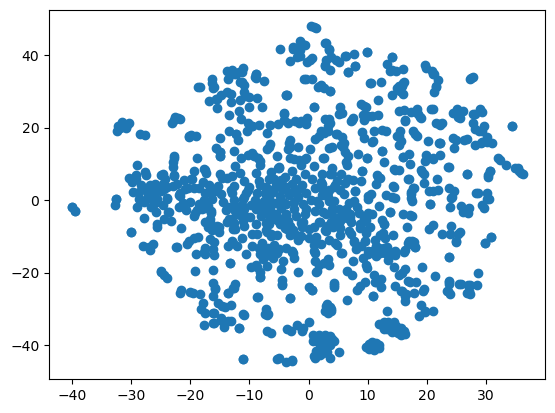

In [61]:
plt.scatter(Y[:, 0], Y[:, 1])

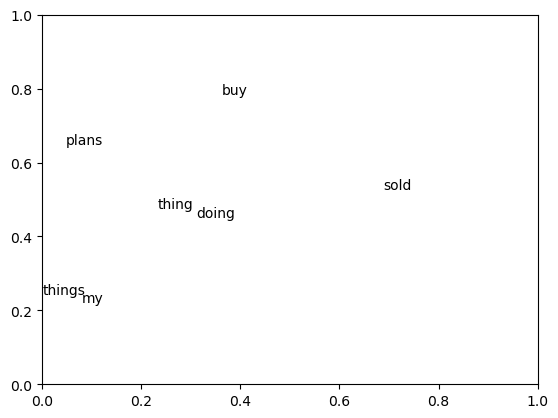

In [62]:
for label, x, y in zip(words, X[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()